# Exercise 1

**USE THE SINGLETON DESIGN PATTERN**

Consider the following code:

```python
def f0(): 
    print('action 0')
def f1(): 
    print('action 1')
def f2(): 
    print('action 2')
def f3(): 
    print('action 3')

actions=[f0, f1, f2, f3]
while True:
    print('enter a number (0-3); 0 to exit') 
    actions[int(input())]()
```

Modify the code so that the program terminates with the call of function `f0`.

`f1`, `f2`, `f3`, must write the message 'I am the function f...' in the log-file `data.txt`.

Write a class that handles communication with the log-file. The class instantiates a single object (Singleton). The object is instantiated when a function other than `f0` is called by the user.
The code to open, write, and close a file is as follows:

```python
with open("data.txt", "w") as f:
    f.write('abc\n') 
    f.write('def\n') 
``` 

To validate the output of the file, you can use the following lines:
```python
with open("data.txt", "r") as f:
    print(f.read())
```


In [1]:
class Logger:
    def __new__(cls):
        if not hasattr(cls, '_instance'):
            cls._instance = super().__new__(cls)
            with open("data.txt", 'w') as f:
                f.write("")
        return cls._instance

    def log(self, message):
        with open("data.txt", 'a') as f:
            f.write(message)
    
def f0(): 
    print('action 0')
    
def f1(): 
    print('action 1')
    l = Logger()
    l.log("I am the function f1\n")

def f2(): 
    print('action 2')
    l = Logger()
    l.log("I am the function f2\n")

def f3(): 
    print('action 3')
    l = Logger()
    l.log("I am the function f3\n")

actions=[f0, f1, f2, f3]
while True:
    print('enter a number (0-3); 0 to exit') 
    action = int(input()) 
    actions[action]()
    if action == 0:
        break



enter a number (0-3); 0 to exit
2
action 2
enter a number (0-3); 0 to exit
1
action 1
enter a number (0-3); 0 to exit
0
action 0


In [2]:
with open("data.txt", 'r') as f:
    content = f.read()

print("Content of the file:")
print(content)

Content of the file:
I am the function f2
I am the function f1



In [1]:
# NOTE this implementation is rather complicated but shows the 
#  real advantages of the singleton

class Logger:
    def __new__(cls):
        if not hasattr(cls, '_instance'):
            cls._instance = super().__new__(cls)
            cls.messages = []
            
            # flush the file
            with open("data.txt", "w") as f:
                f.write("")
            
        return cls._instance    

    def log(self, message):
        self.messages.append(message)

    
    def write_log(self):
        with open("data.txt", 'w') as f:
            f.write("".join(self.messages))


def f0(): 
    l = Logger()
    l.write_log()
    print('action 0')

def f1(): 
    l = Logger()
    l.log("I am the function f1\n")
    print('action 1')

def f2(): 
    l = Logger()
    l.log("I am the function f2\n")
    print('action 2')

def f3(): 
    l = Logger()
    l.log("I am the function f3\n")
    print('action 3')

actions=[f0, f1, f2, f3]

while True:
    command = int(input())
    print('enter a number (0-3); 0 to exit') 
    actions[command]()

    # modify the main so that it ends with f0
    if command == 0:
        break

print("content of data.txt: ")
with open("data.txt", "r") as f:
    print(f.read())

2
enter a number (0-3); 0 to exit
action 2
1
enter a number (0-3); 0 to exit
action 1
3
enter a number (0-3); 0 to exit
action 3
0
enter a number (0-3); 0 to exit
action 0
content of data.txt: 
I am the function f2
I am the function f1
I am the function f3



# Exercise 2

**USE THE TRANSITION TABLES AND THE OBSERVER DESIGN PATTERN**

**Use abstract classes if needed**

An object receives signals 0, 1, 2 using the `signal(x)` method, and characters (one character at a time) using the `c_input(x)` method.

In the initial state `S_init`, the object prints each character received. If it receives signals 0, 1, 2 exactly in this order, it goes into a final state.

In the final state `S_end` the object prints the character following the input character. Assume the character after 'z' is 'a'.

For example:

`c_input(‘a’) -> ‘b’`

`c_input(‘z’) -> ‘a’`

In the state `S_end` 0 signal induces a transition to the initial state. The other signals have no effect.

In intermediate states `S_a`, `S_b` the object does not print the received characters.

Signals that ‘break’ the correct sequence (i.e., 0, 1, 1, ...) induce a transition to the initial state.

NB it is required to implement the object defining 2 intermediate states, not using a counter to manage the transition.

1. Implement the requested behavior using a transition table (implemented by dictionaries);
2. Define 3 observers o1, o2, o3 that respond to the state transition.


Write a main that
- clearly shows the transitions of the stateful object using various signal sequences, by printing the state after each transition;
- clearly shows the behaviour of the observers by subscribing and unsubscribing them;
- clearly shows the behaviour of the stateful object using the method `c_input()`.

Example: takes into account the following sequences (nb all the sequences must start from state `S_init`, so manage the input to the `signal(x)` method in order to reset the state).

Sequence: 0,1,2- > final state: `S_end` 

Sequence: 0,1,1- > final state: `S_init` 

Sequence: 0,0,1- > final state: `S_init` 

Sequence: 0,1,2,1- > final state: `S_end`

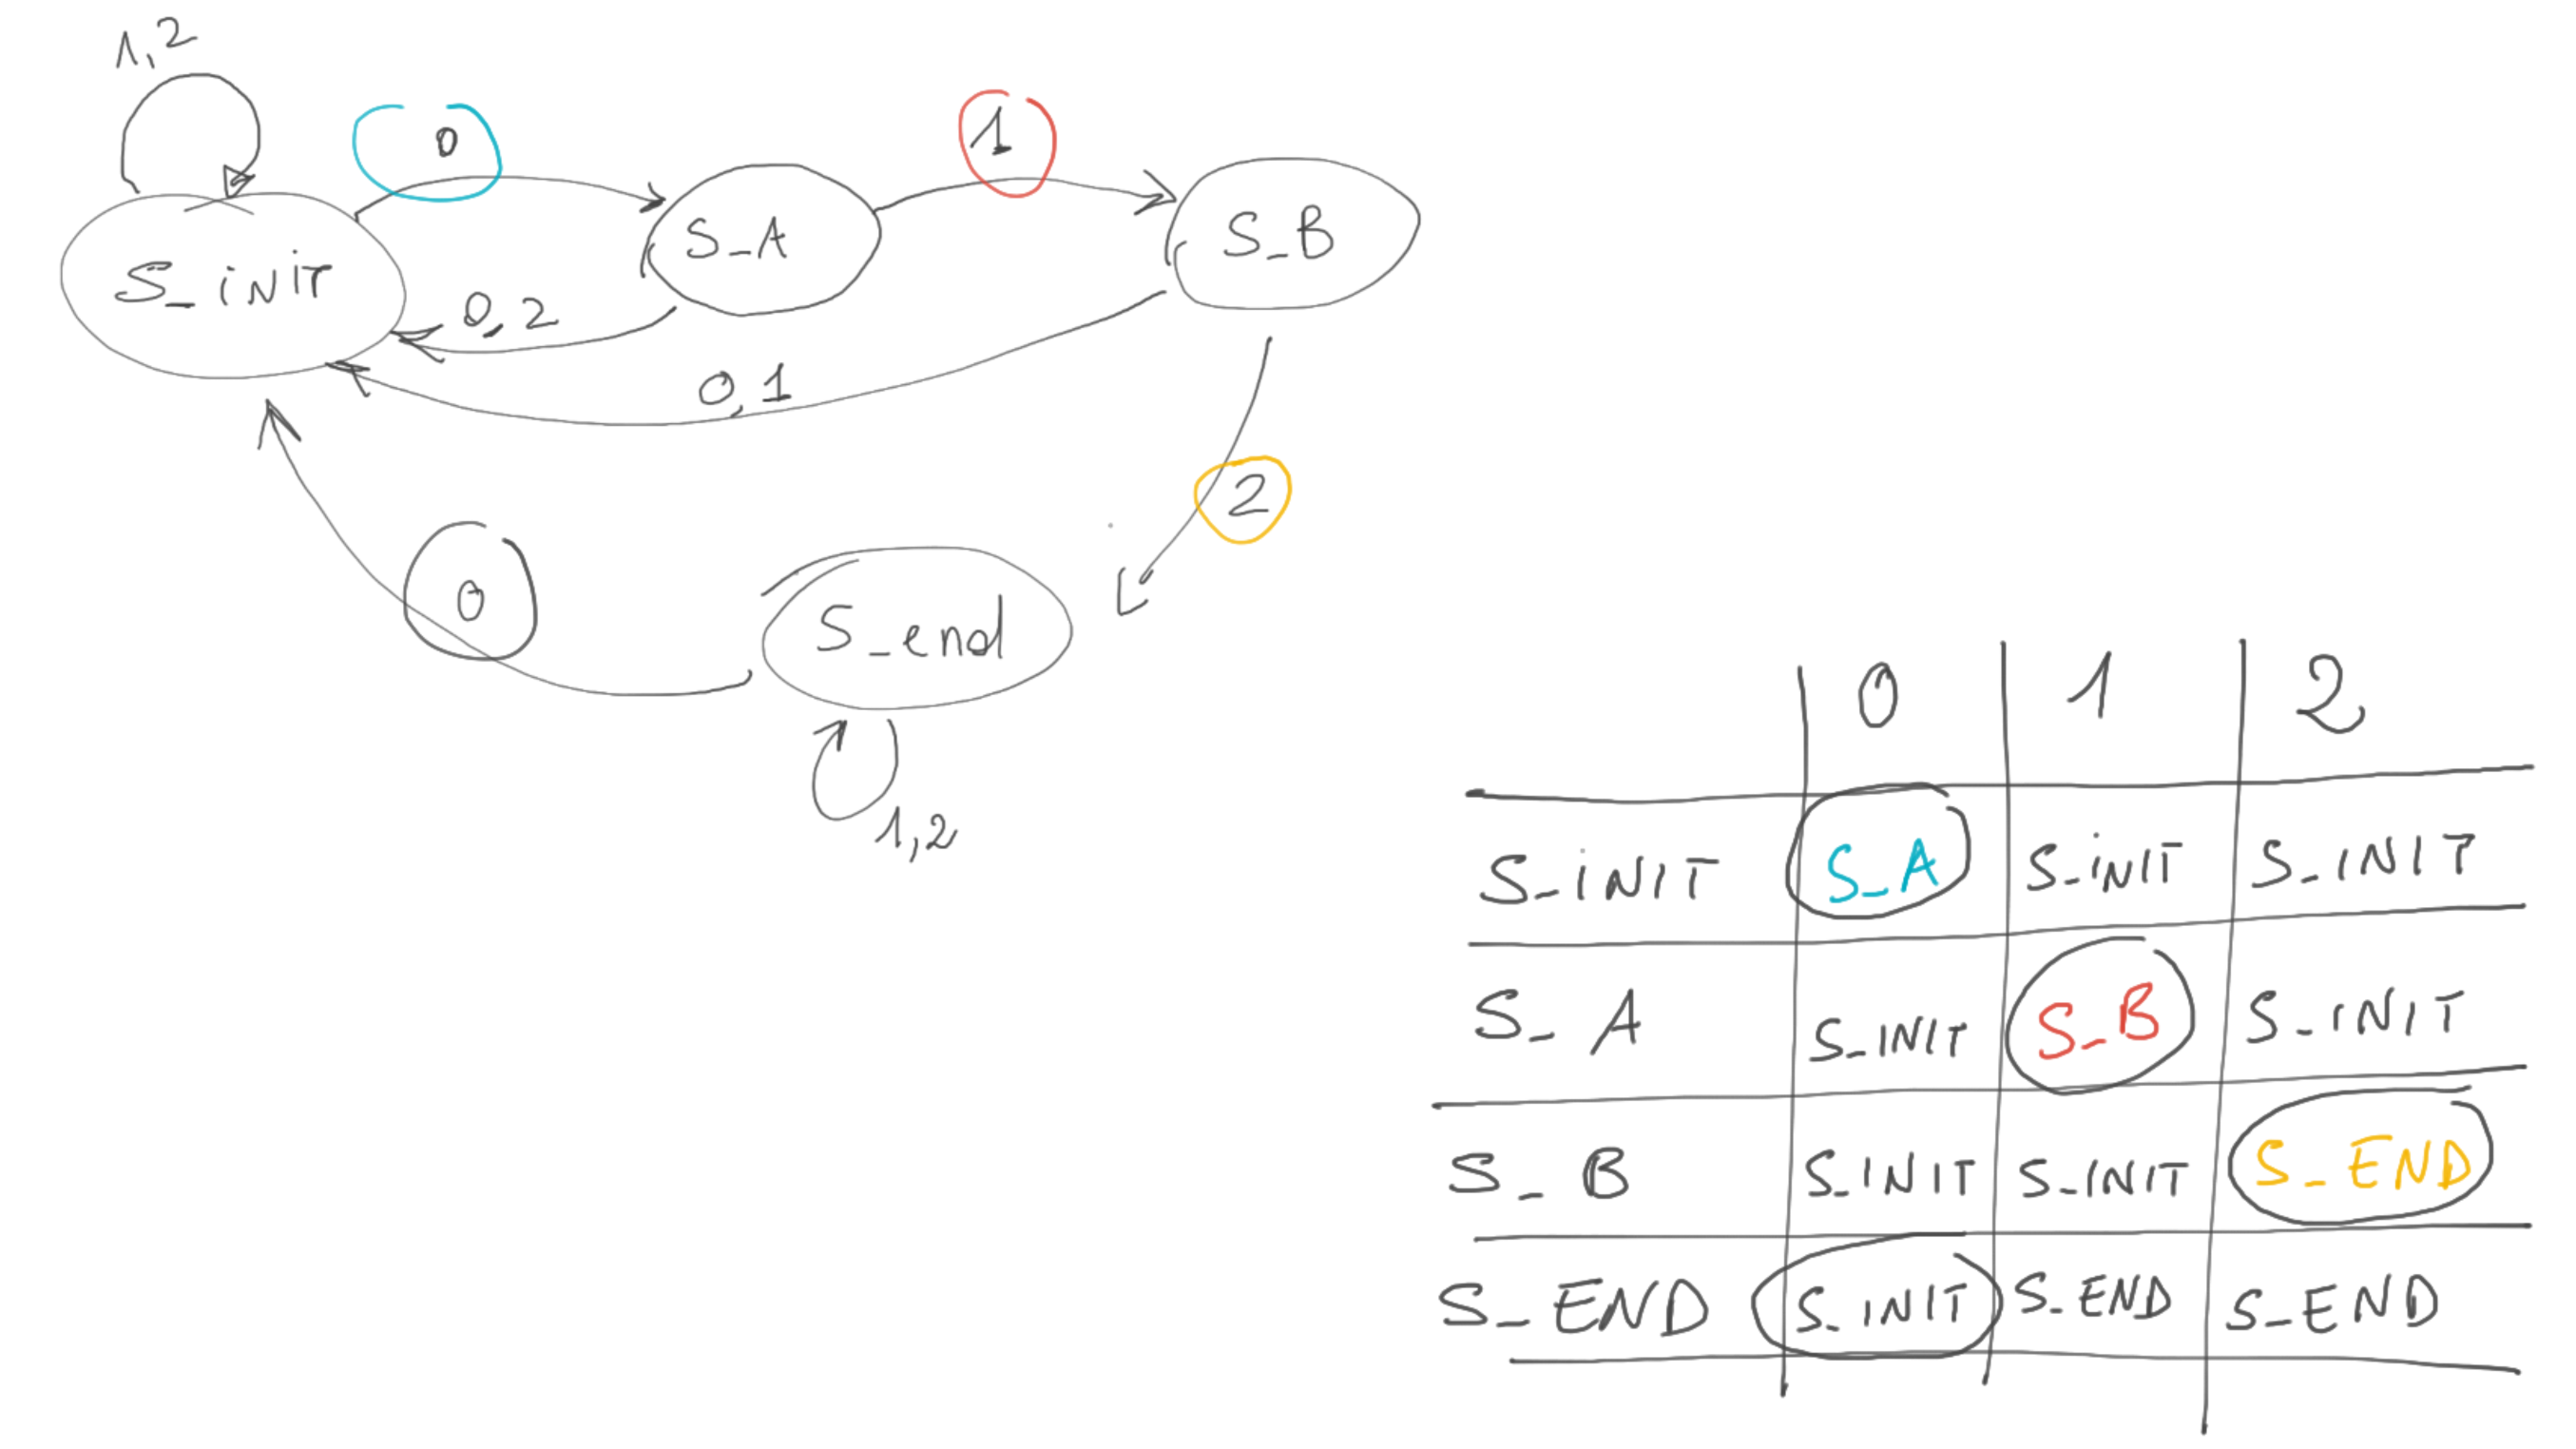

In [4]:
S_INIT = "S_init"
S_A = "S_a"
S_B = "S_b"
S_FINAL = "S_final"

class Receiver:
    def __init__(self):
        self.transition_table = {
            S_INIT: {
                0: {"action": self.print_nothing, "next_state": S_A},
                "default": {"action": self.print_character, "next_state": S_INIT}
            },
            S_A: {
                1: {"action": self.print_nothing, "next_state": S_B},
                "default": {"action": self.print_character, "next_state": S_INIT}
            },
            S_B: {
                2: {"action": self.print_next, "next_state": S_FINAL},
                "default": {"action": self.print_character, "next_state": S_INIT}
            },
            S_FINAL: {
                0: {"action": self.print_nothing, "next_state": S_INIT},
                "default": {"action": self.print_next, "next_state": S_FINAL}
            }
        }
        self._state = S_INIT
        self._action = self.print_character

    @staticmethod
    def print_nothing(c):
        pass
    
    @staticmethod
    def print_character(c):
        print(c)
    
    @staticmethod
    def print_next(c):
        if ord(c) >= ord('a') and ord(c) < ord('z'):
            # print next
            number = ord(c)
            number += 1
            result = chr(number)
        elif c == 'z':
            result = 'a'
        else:
            raise ValueError("Cannot print this character.")
        print(result)
    
    def signal(self, s: int):
        if s not in [0, 1, 2]:
            raise ValueError("Signal not recognized.")
        # get row of the transition matrix
        transition_row = self.transition_table.get(self._state)  
        # get cell of the transition matrix
        transition = transition_row.get(s, None)
        if transition is None:
            transition = transition_row.get("default")

        old_state = self._state
        new_state = transition.get("next_state")

        if old_state != new_state:
            print("new state: ", new_state)
        
        self._state = new_state
        self._action = transition.get("action")

    def c_input(self, c):
        self._action(c)

s1 = [0, 1, 2]  # S_final
s2 = [0, 1, 1]  # S_init
s3 = [0, 0, 1]  # S_init
s4 = [1, 0, 1, 2]  # S_final

for sequence in [s1, s2, s3, s4]:
    r = Receiver()
    for signal in sequence:
        r.signal(signal)
        r.c_input("a")
    print("\n\n")


new state:  S_a
new state:  S_b
new state:  S_final
b



new state:  S_a
new state:  S_b
new state:  S_init
a



new state:  S_a
new state:  S_init
a
a



a
new state:  S_a
new state:  S_b
new state:  S_final
b





In [5]:
S_INIT = "S_init"
S_A = "S_a"
S_B = "S_b"
S_FINAL = "S_final"

class Receiver:
    def __init__(self):
        self.transition_table = {
            S_INIT: {
                0: {"action": self.print_nothing, "next_state": S_A},
                "default": {"action": self.print_character, "next_state": S_INIT}
            },
            S_A: {
                1: {"action": self.print_nothing, "next_state": S_B},
                "default": {"action": self.print_character, "next_state": S_INIT}
            },
            S_B: {
                2: {"action": self.print_next, "next_state": S_FINAL},
                "default": {"action": self.print_character, "next_state": S_INIT}
            },
            S_FINAL: {
                0: {"action": self.print_nothing, "next_state": S_INIT},
                "default": {"action": self.print_next, "next_state": S_FINAL}
            }
        }
        self._state = S_INIT
        self._action = self.print_character

        self.subscribers = dict()

    @staticmethod
    def print_nothing(c):
        pass
    
    @staticmethod
    def print_character(c):
        print(c)
    
    @staticmethod
    def print_next(c):
        if ord(c) >= ord('a') and ord(c) < ord('z'):
            # print next
            number = ord(c)
            number += 1
            result = chr(number)
        elif c == 'z':
            result = 'a'
        else:
            raise ValueError("Cannot print this character.")
        print(result)
    
    def signal(self, s: int):
        if s not in [0, 1, 2]:
            raise ValueError("Signal not recognized.")
        # get row of the transition matrix
        transition_row = self.transition_table.get(self._state)  
        # get cell of the transition matrix
        transition = transition_row.get(s, None)
        if transition is None:
            transition = transition_row.get("default")

        old_state = self._state
        new_state = transition.get("next_state")

        if old_state != new_state:
            print("new state: ", new_state)
            self.dispatch(new_state)
        
        self._state = new_state
        self._action = transition.get("action")

    def c_input(self, c):
        self._action(c)

    def register(self, observer, callback_fn=None):
        default_method = "update"
        if callback_fn is None:
            # set callback to the update method
            callback_fn = getattr(observer, default_method)
        self.subscribers[observer] = callback_fn

    def unregister(self, observer):
        del self.subscribers[observer]

    def dispatch(self, message):
        for subscriber, callback_fn in self.subscribers.items():
            callback_fn(message)

class Observer:
    def __init__(self, name):
        self.name = name

    def update(self, message):
        print(self.name + " " + message)


s1 = [0, 1, 2]  # S_final
s2 = [0, 1, 1]  # S_init
s3 = [0, 0, 1]  # S_init
s4 = [1, 0, 1, 2]  # S_final

for sequence in [s1, s2, s3, s4]:
    r = Receiver()
    o1 = Observer("observer 1")
    o2 = Observer("observer 2")
    o3 = Observer("observer 3")
    print("register o1 and o2")
    r.register(o1)
    r.register(o2)
    for index, signal in enumerate(sequence):
        r.signal(signal)
        r.c_input("a")
        if index == 1:
            print("unregister o2")
            r.unregister(o2)
            print("register o3")
            r.register(o3)
    print("\n\n")

register o1 and o2
new state:  S_a
observer 1 S_a
observer 2 S_a
new state:  S_b
observer 1 S_b
observer 2 S_b
unregister o2
register o3
new state:  S_final
observer 1 S_final
observer 3 S_final
b



register o1 and o2
new state:  S_a
observer 1 S_a
observer 2 S_a
new state:  S_b
observer 1 S_b
observer 2 S_b
unregister o2
register o3
new state:  S_init
observer 1 S_init
observer 3 S_init
a



register o1 and o2
new state:  S_a
observer 1 S_a
observer 2 S_a
new state:  S_init
observer 1 S_init
observer 2 S_init
a
unregister o2
register o3
a



register o1 and o2
a
new state:  S_a
observer 1 S_a
observer 2 S_a
unregister o2
register o3
new state:  S_b
observer 1 S_b
observer 3 S_b
new state:  S_final
observer 1 S_final
observer 3 S_final
b



